In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from tqdm import tqdm
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle
import tensorflow as tf
import math
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve


In [2]:
""" One v.s. All binary classification """

' One v.s. All binary classification '

In [3]:
df = pd.read_csv("../Data_Scrape/Dataset/updated_dataset.csv")

In [4]:
df.head()

,sp_song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,lda_topic_11,lda_topic_12,lda_topic_13,lda_topic_14,lda_topic_15,lda_topic_16,lda_topic_17,lda_topic_18,lda_topic_19,Playlists
0,6edQfeOlqbGteYixpJl3Sm,0.857,0.602,10,-8.311,1,0.0290,0.489000,0.02440,0.3170,...,0.0,0.022993,0.000000,0.122078,0.0,0.000000,0.000000,0.081108,0.386042,[165]
1,5Oe7wHPL4hdEXeF4AOayCi,0.322,0.990,8,-1.785,1,0.1710,0.000044,0.41700,0.0366,...,0.0,0.000000,0.163142,0.022999,0.0,0.144614,0.187207,0.000000,0.000000,[79]
2,6i1uWZYWabNHq2wQnoca58,0.666,0.884,9,-5.243,0,0.0429,0.506000,0.00612,0.0408,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.582131,[15]
3,4BzBtS6PBreni5hNPo2hos,0.609,0.578,9,-7.081,1,0.0414,0.296000,0.00000,0.1500,...,0.0,0.000000,0.511716,0.084905,0.0,0.000000,0.000000,0.115004,0.108140,[168]
4,0GvhHQbWSnGltjl0je61dI,0.699,0.514,4,-12.610,1,0.0315,0.587000,0.02900,0.2200,...,0.0,0.000000,0.000000,0.401954,0.0,0.000000,0.000000,0.000000,0.000000,"[30, 133]"


In [5]:
playlists_multi = [132, 123,19,46,60,68,79,125]  #132, 123,19,46,60,68,79,125
# playlists_multi = [i for i in range(1,169,1)]  #132, 123,19,46,60,68,79,125

dict_playlists_to_songs = {}
data = np.array(df)
Dataset = []
for j in playlists_multi:
    l0 = []
    for i in df.index:
        l = eval(df["Playlists"][i])
        if(j in l):
            l.remove(j)
            flag = 0
            for k in playlists_multi:
                    if(k!=j and k in l):
                        flag = 1
            if(flag!=1):
                l0.append(df["sp_song_id"][i])
                Dataset.append(data[i])
                
    dict_playlists_to_songs[j] = l0
#     print(len(l0))
print(len(dict_playlists_to_songs))
Dataset = np.array(Dataset)
print(Dataset.shape)
np.random.shuffle(Dataset)
print(Dataset[0])



8
(2547, 36)
['0EYOdF5FCkgOJJla8DI2Md' 0.556 0.981 1 -2.688 0 0.128 0.00662 0.0 0.218
 0.716 101.42299999999999 255467 2005 75 0.1136651337146759
 0.13335412740707395 0.0 0.0 0.0 0.0 0.0 0.0 0.030962647870182988 0.0 0.0
 0.10412494838237762 0.0 0.0 0.0 0.0 0.28551968932151794
 0.11562371999025345 0.09813108295202257 0.11474650353193284
 '[40, 46, 67, 77, 84]']


In [6]:
X = Dataset[:,1:-1]
Y = Dataset[:,-1]
# print(Y)
for i in range(len(Y)):
    Y[i] = eval(Y[i])
    for j in playlists_multi:
        if(j in Y[i]):
            Y[i] = j
            break
    
print(X.shape)
print(Y.shape)



(2547, 34)
(2547,)


In [7]:
X = np.array(X)
y = np.array(Y)
y = Y.reshape(-1, 1)
standardScalar = StandardScaler()
X = standardScalar.fit_transform(X)
print(X.shape, y.shape)
y = np.squeeze(y)
# print(X)
# print(y)

(2547, 34) (2547, 1)


In [8]:
y = y.astype("str")
# print(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)
print(tsne_em)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2037 samples in 0.016s...
[t-SNE] Computed neighbors for 2037 samples in 0.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2037
[t-SNE] Computed conditional probabilities for sample 2000 / 2037
[t-SNE] Computed conditional probabilities for sample 2037 / 2037
[t-SNE] Mean sigma: 1.750670
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.951363
[t-SNE] KL divergence after 1000 iterations: 1.816343
[[ 29.049982    -3.9251611 ]
 [ 24.07252     -0.63237256]
 [-44.09343      8.117212  ]
 ...
 [ 34.944416    -1.6291178 ]
 [ 12.277303   -11.581576  ]
 [ 22.768602    21.652424  ]]


In [12]:
df_tsne= pd.DataFrame(columns = ["x", "y", "label"] )
df_tsne["x"] = tsne_em[:,0]
df_tsne["y"] = tsne_em[:,1]
df_tsne["label"] = y_train

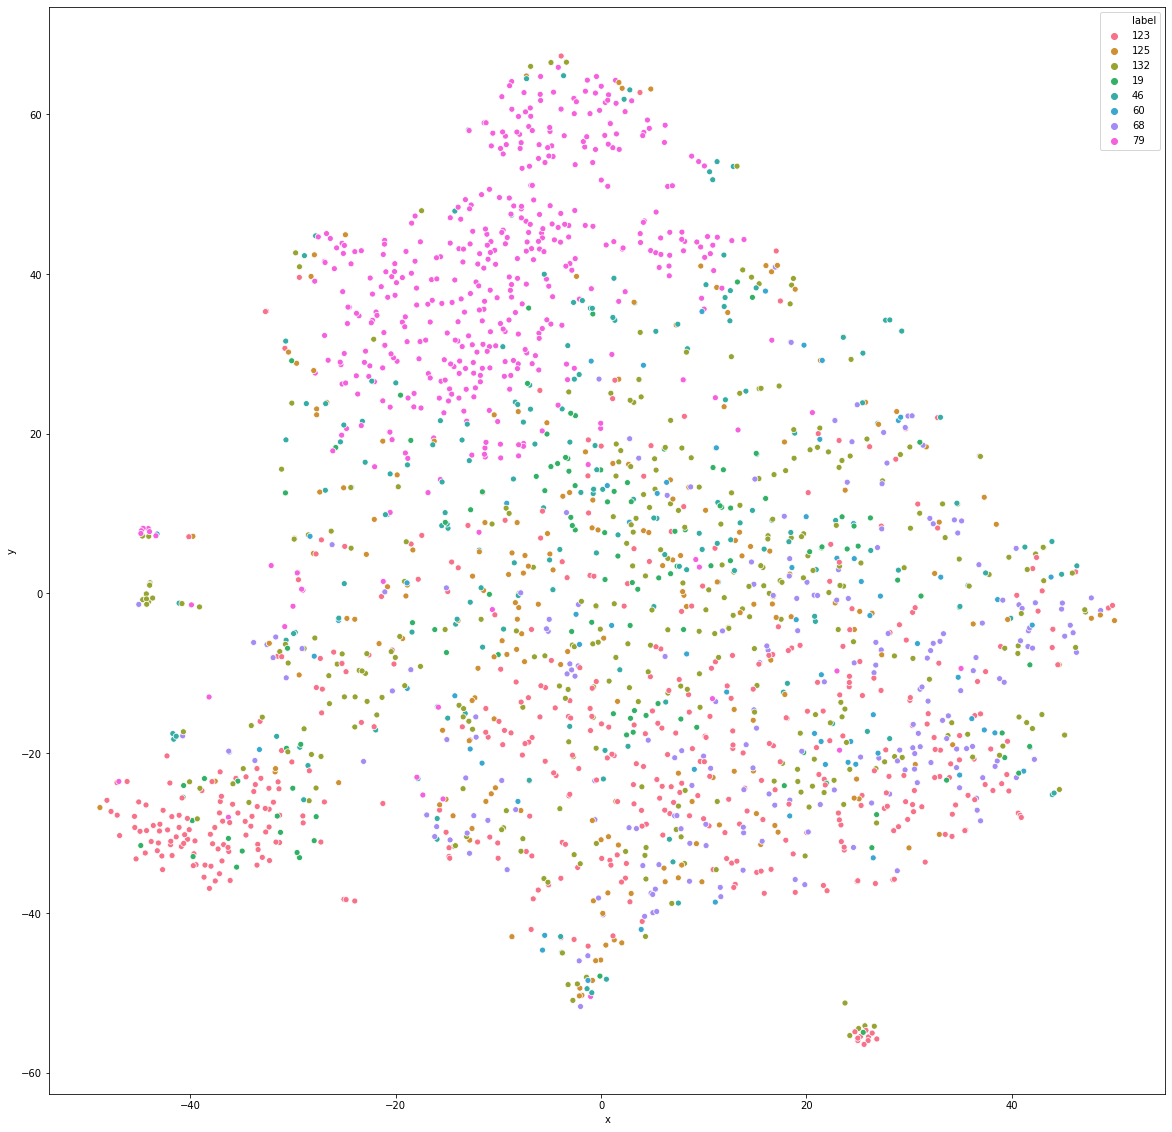

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,20))
# plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green", hue = y_train);
sns.scatterplot(x = df_tsne["x"], y = df_tsne["y"], hue = df_tsne["label"],  palette = sns.color_palette("husl", len(set(y_train))))
plt.show()

In [14]:

logistic = LogisticRegression(solver = "saga", multi_class = "multinomial")

logistic.fit(X_train, y_train)

test_score = logistic.score(X_test, y_test)

y_pred = logistic.predict(X_test)
pres_score = precision_score(y_test, y_pred, average = "weighted")

f1= f1_score(y_test, y_pred, average = "weighted")
recall_Score = recall_score(y_test, y_pred, average = "weighted")
print(test_score, pres_score, f1, recall_Score)

0.6058823529411764 0.5825595116018293 0.5929144700320406 0.6058823529411764


/home/pankil/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [15]:
""" One vs One Binary classification"""

' One vs One Binary classification'

In [16]:
df = pd.read_csv("../Data_Scrape/Dataset/updated_dataset.csv")

In [17]:
df.head()

,sp_song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,lda_topic_11,lda_topic_12,lda_topic_13,lda_topic_14,lda_topic_15,lda_topic_16,lda_topic_17,lda_topic_18,lda_topic_19,Playlists
0,6edQfeOlqbGteYixpJl3Sm,0.857,0.602,10,-8.311,1,0.0290,0.489000,0.02440,0.3170,...,0.0,0.022993,0.000000,0.122078,0.0,0.000000,0.000000,0.081108,0.386042,[165]
1,5Oe7wHPL4hdEXeF4AOayCi,0.322,0.990,8,-1.785,1,0.1710,0.000044,0.41700,0.0366,...,0.0,0.000000,0.163142,0.022999,0.0,0.144614,0.187207,0.000000,0.000000,[79]
2,6i1uWZYWabNHq2wQnoca58,0.666,0.884,9,-5.243,0,0.0429,0.506000,0.00612,0.0408,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.582131,[15]
3,4BzBtS6PBreni5hNPo2hos,0.609,0.578,9,-7.081,1,0.0414,0.296000,0.00000,0.1500,...,0.0,0.000000,0.511716,0.084905,0.0,0.000000,0.000000,0.115004,0.108140,[168]
4,0GvhHQbWSnGltjl0je61dI,0.699,0.514,4,-12.610,1,0.0315,0.587000,0.02900,0.2200,...,0.0,0.000000,0.000000,0.401954,0.0,0.000000,0.000000,0.000000,0.000000,"[30, 133]"


In [18]:
""" SVM - Linear Classification  """

' SVM - Linear Classification  '

In [19]:
def run_model(model_type = "LR", neighbours = 5):
    playlists = []
    result_history = {}

    np.random.seed(123)

    for playlist in tqdm(range(0,169,1), desc = "Progress : ", position = 0, leave = True):
        X = []
        y = []
        list_of_is = []
        for i in df.index:
            a = list(df.iloc[i])[1:-1]
            if playlist in eval(df['Playlists'][i]):
                X.append(a)
                y.append(1)
            else:
                _ = np.random.randint(0, 26)
                if _ == 0:
                    X.append(a)
                    y.append(0)



        X = np.array(X)
        y = np.array(y)



        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify = y)

        standardScalar = StandardScaler()
        X_train = standardScalar.fit_transform(X_train)
        X_test = standardScalar.transform(X_test)
        
        
        if(model_type == "LR" ):
            model = LogisticRegression()
            
        elif(model_type == "SVM"):
            model = SVC(kernel = 'linear')
        
        elif (model_type == "DT"):
            model = DecisionTreeClassifier(criterion = 'entropy', max_depth =  20)
            
        elif (model_type == "RF"):
            model = RandomForestClassifier(criterion = 'entropy')
            
        
        elif(model_type == "XGB"):
            
            param = {
                "learning_rate" : 0.1,
                "n_estimators" : 500,
                "max_depth" : 20,
                "min_child_weight" : 1,
                "gamma" : 0.1,
                "subsample": 0.9,
                "colsample_bytree" : 0.9,
                "objective" : 'binary:logistic',
                "nthread" : 4,
                "scale_pos_weight" :  1,
                "seed" : 27
            }
            
            model = XGBClassifier(**param)
        
        elif(model_type == "KNN"):
            model = KNeighborsClassifier(n_neighbors=neighbours)
            
        elif(model_type == "ANN"):
            model = Sequential([Dense(units = 24, input_shape = (34, ), activation = 'relu'),
            Dense(units = 12, activation = 'relu'),
            Dense(units = 4, activation = 'relu'),       
            Dense(units = 1, activation = 'sigmoid')
            ])
            model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.05), loss = 'binary_crossentropy', metrics = ['accuracy'])
            model.summary()
            
        


#         xgb = XGBClassifier(**param)    
        
        if model_type != 'ANN':
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        else:
            model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 20)
            y_pred = model.predict_classes(X_test)
            

        pres_score = precision_score(y_test, y_pred, average = "macro")

        f1= f1_score(y_test, y_pred, average = "macro")
        recall_Score = recall_score(y_test, y_pred, average = "macro")

        result_history[playlist] = {"Precision Score " : pres_score, "Recall Score " : recall_Score, "F1 Score " : f1 }


    print(result_history)
    return result_history

In [20]:
# f = open("binary_svc_linear_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [ ]:
f = open("binary_svc_linear_result", "rb")
l = pickle.load(f)
f.close()

In [ ]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [ ]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

In [ ]:
""" Logistic Regression Result"""

In [ ]:
result_history = run_model(model_type = "LR")

In [ ]:
# f = open("binary_linear_regression_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [ ]:
f = open("binary_linear_regression_result", "rb")
l = pickle.load(f)
f.close()

In [ ]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [ ]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

In [ ]:
""" Decision Tree Result"""

In [ ]:
result_history = run_model(model_type = "DT")

In [ ]:
# f = open("binary_decision_tree_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [ ]:
f = open("binary_decision_tree_result", "rb")
l = pickle.load(f)
f.close()

In [ ]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [ ]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

In [ ]:
""" Random Forest Result"""

In [ ]:
result_history = run_model(model_type = "RF")

In [ ]:
# f = open("binary_random_forest_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [ ]:
f = open("binary_random_forest_result", "rb")
l = pickle.load(f)
f.close()

In [ ]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [ ]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

In [ ]:
""" XG Boost Result"""

In [ ]:
result_history = run_model(model_type = "XGB")

In [ ]:
# f = open("binary_xgb_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [ ]:
f = open("binary_xgb_result", "rb")
l = pickle.load(f)
f.close()

In [ ]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [ ]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

KNN Classification

In [ ]:
n_neighbours = 13

In [ ]:
result_history = run_model(model_type = "KNN", neighbours = n_neighbours)

In [ ]:
f = open("binary_KNN_"+str(n_neighbours)+"_result", "wb")
pickle.dump(result_history, f)
f.close()

In [ ]:
f = open("binary_KNN_"+str(n_neighbours)+"_result", "rb")
l = pickle.load(f)
f.close()

In [ ]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [ ]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

In [ ]:
f1_list = []
for key in list(l.keys()):
    f1_list.append(l[key]['F1 Score '])
print(f1_list)

In [ ]:
print(sum(f1_list)/len(f1_list))

ANN Classification (Deep Learning)

In [ ]:
result_history = run_model(model_type = "ANN")

In [ ]:
# f = open("binary_ANN_result", "wb")
# pickle.dump(result_history, f)
# f.close()

In [ ]:
f = open("binary_ANN_result", "rb")
l = pickle.load(f)
f.close()

In [ ]:
l = {k: v for k, v in sorted(l.items(), key=lambda item: item[1]["F1 Score "], reverse = True)}

In [ ]:
# Top 20 playlists 
for key in list(l.keys())[:20]:
    print(key," = ",  l[key])

In [ ]:
f1_list = []
for key in list(l.keys()):
    f1_list.append(l[key]['F1 Score '])
print(f1_list)

In [ ]:
print(sum(f1_list)/len(f1_list))

In [ ]:
f = open("binary_svc_linear_result", "rb")
l1 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_linear_regression_result", "rb")
l2 = pickle.load(f)
f.close()   

In [ ]:
f = open("binary_decision_tree_result", "rb")
l3 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_random_forest_result", "rb")
l4 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_xgb_result", "rb")
l5 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_KNN_13_result", "rb")
l6 = pickle.load(f)
f.close()

In [ ]:
f = open("binary_ANN_result", "rb")
l7 = pickle.load(f)
f.close()

In [ ]:
l1

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l1[i]['F1 Score ']
    s2 += l1[i]['Precision Score ']
    s3 += l1[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("SVC:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l2[i]['F1 Score ']
    s2 += l2[i]['Precision Score ']
    s3 += l2[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("LR:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l3[i]['F1 Score ']
    s2 += l3[i]['Precision Score ']
    s3 += l3[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("DT:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l4[i]['F1 Score ']
    s2 += l4[i]['Precision Score ']
    s3 += l4[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("RF:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l5[i]['F1 Score ']
    s2 += l5[i]['Precision Score ']
    s3 += l5[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("XGB:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l6[i]['F1 Score ']
    s2 += l6[i]['Precision Score ']
    s3 += l6[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("KNN_13:", s1, s2, s3)

In [ ]:
s1 = 0
s2 = 0
s3 = 0
for i in range(169):
    s1 += l7[i]['F1 Score ']
    s2 += l7[i]['Precision Score ']
    s3 += l7[i]['Recall Score ']
s1 = s1/169
s2 = s2/169
s3 = s3/169
print("ANN:", s1, s2, s3)